In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import pypsa

In [2]:
dfa = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1a', skiprows=1)
dfb = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1b', skiprows=1)
dfc = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1c', skiprows=1)
dfd = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1d', skiprows=1)
dfa['component'] = 'line'
dfa['carrier'] = 'AC'
dfb['component'] = 'line'
dfb['carrier'] = 'AC'
dfc['component'] = 'line'
dfc['carrier'] = 'AC'
dfd['component'] = 'line'
dfd['carrier'] = 'AC'
dfe = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-3-1a', skiprows=1)
dff = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-3-1b', skiprows=1)
dff.rename(columns={'Node1': 'Node 1', 'Node2': 'Node 2'}, inplace=True)
dfg = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-3-1c', skiprows=1)
dfg.rename(columns={'Node1': 'Node 1', 'Node2': 'Node 2'}, inplace=True)
dfh = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-3-1d', skiprows=1)
dfe['component'] = 'transformer'
dfe['carrier'] = 'AC'
dff['component'] = 'transformer'
dff['carrier'] = 'AC'
dfg['component'] = 'transformer'
dfg['carrier'] = 'AC'
dfh['component'] = 'transformer'
dfh['carrier'] = 'AC'
dfi = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-5-1', skiprows=1)
# filter out only those with existing in Existing column
dfi = dfi[dfi['Existing'] == 'Yes']
dfi['component'] = 'link'
dfi['carrier'] = 'DC'

dfj = pd.read_excel('../data/GB_network.xlsx', sheet_name='Extra_WF_edges')
dfj['component'] = 'line'
dfj['carrier'] = 'AC'

df = pd.concat([dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi, dfj], ignore_index=True)
df.rename(columns={'Node 1': 'bus0', 'Node 2': 'bus1'}, inplace=True)
df.index.name = 'name'
df.reset_index(drop=True, inplace=True)
# remove lines with Winter Rating (MVA) = 9999
# df = df[df['Winter Rating (MVA)'] != 9999]
# replace any node called Central DC Substation with BLHI4-
df['bus0'] = df['bus0'].str.replace('Central DC Substation', 'BLHI4-')
df['bus1'] = df['bus1'].str.replace('Central DC Substation', 'BLHI4-')
# get line data in pypsa format
df.rename(columns={'R (% on 100 MVA)': 'r', 'X (% on 100 MVA)': 'x', 'B (% on 100 MVA)': 'b', 'Winter Rating (MVA)': 's_nom'}, inplace=True)
df

,bus0,bus1,OHL Length (km),Cable Length (km),Circuit Type,r,x,b,s_nom,Spring Rating (MVA),...,Planned from year,Type,Rated Voltage (kV),Length(km),Metallic Return,Node 1 MVAr Gen,Node 1 MVAr Abs,Node 2 MVAr Gen,Node 2 MVAr Abs,Unique ID
0,ABBA1-,DYCE1J,0.000,7.800,Cable,0.1092,1.2324,10.140,173.0,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABNE1Q,ABNE1R,0.000,1.000,Cable,0.0100,0.0100,0.000,9999.0,9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABNE1Q,CHAR1-,24.500,0.000,OHL,2.4900,5.6600,1.220,132.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABNE1R,AMUL1G,28.099,0.001,Composite,2.8706,6.5818,1.397,132.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACHR1R,INVE1J,21.170,0.000,OHL,0.3387,3.9588,1.291,739.0,710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,THAW11,RICH41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extra_WF_21
2945,THAW12,RICH41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extra_WF_22
2946,WAAO11,HEYS41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extra_WF_23
2947,WABO11,STAH11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extra_WF_24


In [3]:
# buses from line data
df_buses = pd.concat([df['bus0'], df['bus1']]).unique()
df_buses = pd.DataFrame(df_buses, columns=['name'])
df_buses.index = df_buses['name']
df_buses.index.name = 'name'
df_buses

,name
name,
ABBA1-,ABBA1-
ABNE1Q,ABNE1Q
ABNE1R,ABNE1R
ACHR1R,ACHR1R
AIGA1Q,AIGA1Q
...,...
WERW31,WERW31
WERW32,WERW32
LONO41,LONO41


In [4]:
voltage_data = {'1': 132, '2': 275, '3': 33, '4': 400, '5': 11, '6': 66, '7': 20.5}
# extract first character of string which is a number from df_buses name column
map = df_buses['name'].str.extract('(\d+)', expand=False)
# remove all apart from the first character of the string
map = map.str[0]
# use this map to add voltage data to df_buses
df_buses['v_nom'] = map.map(voltage_data)
df_buses

,name,v_nom
name,,
ABBA1-,ABBA1-,132.0
ABNE1Q,ABNE1Q,132.0
ABNE1R,ABNE1R,132.0
ACHR1R,ACHR1R,132.0
AIGA1Q,AIGA1Q,132.0
...,...,...
WERW31,WERW31,33.0
WERW32,WERW32,33.0
LONO41,LONO41,400.0


In [5]:
# create a new dataframe from df with the bus0 and bus1 columns and carrier column
df_carrier = df[['bus0', 'bus1', 'carrier']]
df_carrier2 = df_carrier.copy()
# make bus0 index, while dropping column
df_carrier = df_carrier.set_index('bus0', drop=True)
# drop bus 1 column
df_carrier = df_carrier.drop(columns=['bus1'])

df_carrier2 = df_carrier2.set_index('bus1', drop=True)
# drop bus 0 column
df_carrier2 = df_carrier2.drop(columns=['bus0'])
# set both index names to name
df_carrier.index.name = 'name'
df_carrier2.index.name = 'name'
# concat dfs
df_carrier = pd.concat([df_carrier, df_carrier2])
# drop duplicates
df_carrier = df_carrier[~df_carrier.index.duplicated(keep='first')]
# add carrier column to df_buses
df_buses['carrier'] = df_buses.index.map(df_carrier['carrier'])
df_buses

,name,v_nom,carrier
name,,,
ABBA1-,ABBA1-,132.0,AC
ABNE1Q,ABNE1Q,132.0,AC
ABNE1R,ABNE1R,132.0,AC
ACHR1R,ACHR1R,132.0,AC
AIGA1Q,AIGA1Q,132.0,AC
...,...,...,...
WERW31,WERW31,33.0,AC
WERW32,WERW32,33.0,AC
LONO41,LONO41,400.0,AC


In [6]:
# FES data with GSP locations
df2 = pd.read_excel('../data/Regional breakdown of FES23 data (ETYS 2023 Appendix E).xlsb', sheet_name='GSP info', skiprows=4, index_col=1)
# df2.index = df2.index.str[:4]
df2 = df2[~df2.index.duplicated(keep='first')]
df2.rename(columns={'Latitude':'y', 'Longitude': 'x'}, inplace=True)
# df2.drop(['ROTI'], inplace=True)
df2.drop(columns=['Name'], inplace=True)
df2.index.name = 'name'
df2['name'] = df2.index
df2

,Unnamed: 0,GSP Group,Minor FLOP,y,x,Comments,name
name,,,,,,,
ABNE_P,NaN,_P,T4,56.339456,-3.293751,NaN,ABNE_P
ABTH_1,NaN,_K,H2,51.385210,-3.403318,NaN,ABTH_1
ABHA1,NaN,_L,F6,50.471559,-3.729489,NaN,ABHA1
ACTL_C,NaN,_C,A7,51.534951,-0.257050,NaN,ACTL_C
ACTL_2,NaN,_H,A7,51.534951,-0.257050,NaN,ACTL_2
...,...,...,...,...,...,...,...
G_EXTRA_8,NaN,_N,S6,55.646024,-4.793802,"GSP ""SACO"" modelled as 2 parts (split busbar)",G_EXTRA_8
G_EXTRA_9,NaN,_N,S6,55.646024,-4.793802,"GSP ""SACO"" modelled as 2 parts (split busbar)",G_EXTRA_9
G_EXTRA_10,NaN,_N,S6,55.821124,-4.364302,"GSP ""CROO"" modelled as 2 parts (split busbar)",G_EXTRA_10


In [7]:
# Step 1: Define a function that takes an index and returns the corresponding x and y values from `df2` where the first 4 characters of the index match.
def get_xy(index):
    matching_df2 = df2[df2.index.str[:4] == index[:4]]
    if not matching_df2.empty:
        return matching_df2.iloc[0]['x'], matching_df2.iloc[0]['y']
    else:
        return None, None

# Step 2: Apply this function to the index of `df_buses` to create the new columns.
df_buses['x'], df_buses['y'] = zip(*df_buses.index.map(get_xy))
df_buses = df_buses.fillna(np.nan)
df_buses

,name,v_nom,carrier,x,y
name,,,,,
ABBA1-,ABBA1-,132.0,AC,NaN,NaN
ABNE1Q,ABNE1Q,132.0,AC,-3.293751,56.339456
ABNE1R,ABNE1R,132.0,AC,-3.293751,56.339456
ACHR1R,ACHR1R,132.0,AC,NaN,NaN
AIGA1Q,AIGA1Q,132.0,AC,NaN,NaN
...,...,...,...,...,...
WERW31,WERW31,33.0,AC,NaN,NaN
WERW32,WERW32,33.0,AC,NaN,NaN
LONO41,LONO41,400.0,AC,NaN,NaN


In [8]:
# # add ETYS load data
# df_load = pd.read_excel('../data/ETYS23 Appendix G_1.xlsx', sheet_name='demand data 2022', skiprows=8)
# df_load = df_load.iloc[1:]
# df_load.index = df_load['Unnamed: 0']
# df_load.index.name = 'name'
# df_load = df_load[['23/24']]
# df_load.rename(columns={'23/24': 'p_set'}, inplace=True)
# df_load

,p_set
name,
ABHA4A,97.4804
ABHA4B,97.4804
ABNE10,32.661137
ABTH20,144.558932
ALDW20,49
...,...
WTHU4A,14.55
WTHU4B,14.55
WWEY20,388.7


In [9]:
network = pypsa.Network()
network.set_snapshots(range(1))
network.import_components_from_dataframe(df_buses, "Bus")
network.import_components_from_dataframe(df, "Line")

# network.import_components_from_dataframe(df3_load, "Load")
network.consistency_check()

Index(['701', '1058', '1059', '1060', '1219', '1220', '1222', '1223', '1240',
       '1241', '1347', '1348', '1349', '1350', '1364'],
      dtype='object', name='Line')
Index(['434', '582', '584', '647', '671', '672', '678', '701', '719', '726',
       '1058', '1059', '1060', '1074', '1075', '1078', '1079', '1101', '1102',
       '1133', '1134', '1178', '1219', '1220', '1222', '1223', '1240', '1241',
       '1285', '1286', '1313', '1347', '1348', '1349', '1350', '1364', '1365',
       '1366'],
      dtype='object', name='Line')


In [10]:
# guess the coordinates of buses with NaN coordinates

# Initialize the previous counts
prev_count_x = len(network.buses) + 1
prev_count_y = len(network.buses) + 1

while True:
    # Get the current counts
    curr_count_x = network.buses['x'].isna().sum()
    curr_count_y = network.buses['y'].isna().sum()

    # If neither count has changed, break the loop
    if prev_count_x == curr_count_x and prev_count_y == curr_count_y:
        break

    # Update the previous counts
    prev_count_x = curr_count_x
    prev_count_y = curr_count_y

    # Print the number of buses with NaN coordinates
    print(f"There are {curr_count_x + curr_count_y} buses with NaN coordinates.")
    
    # For each bus with NaN coordinates
    for bus in network.buses[network.buses['x'].isna() | network.buses['y'].isna()].index:
        # Find lines connected to this bus
        connected_lines = network.lines[(network.lines['bus0'] == bus) | (network.lines['bus1'] == bus)]
        # Get the buses at the ends of these lines
        connected_buses = network.buses.loc[pd.concat([connected_lines['bus0'], connected_lines['bus1']]).unique()]
        # Exclude the current bus
        connected_buses = connected_buses[connected_buses.index != bus]
        # If there are any connected buses with known coordinates
        if not connected_buses.dropna(subset=['x', 'y']).empty:
            # Estimate the coordinates of the current bus as the mean of the coordinates of the connected buses
            network.buses.loc[bus, ['x', 'y']] = connected_buses[['x', 'y']].mean()

# update df with new coordinates
df_buses = network.buses
# remove lines with NaN coordinates
# network.lines = network.lines[network.lines['bus0'].isin(network.buses.index) & network.lines['bus1'].isin(network.buses.index)]

There are 1824 buses with NaN coordinates.
There are 636 buses with NaN coordinates.
There are 118 buses with NaN coordinates.
There are 26 buses with NaN coordinates.
There are 0 buses with NaN coordinates.


In [11]:
# new network with updated locations of buses
network = pypsa.Network()
network.set_snapshots(range(1))

network.import_components_from_dataframe(df_buses, "Bus")

# filter df with component of line
df_line = df[df['component'] == 'line']
df_line.to_csv('lines.csv')
network.import_components_from_dataframe(df_line, "Line")

# filter df with component of transformer
df_transformer = df[df['component'] == 'transformer']
# drop s_nom column
df_transformer = df_transformer.drop(columns=['s_nom'])
# change name of Rating (MVA) to s_nom
df_transformer.rename(columns={'Rating (MVA)': 's_nom'}, inplace=True)
network.import_components_from_dataframe(df_transformer, "Transformer")

# filter df with component of link
df_link = df[df['component'] == 'link']
# rename s_nom to p_nom
df_link.rename(columns={'s_nom': 'p_nom'}, inplace=True)
network.import_components_from_dataframe(df_link, "Link")

network.import_components_from_dataframe(df_load, "Load")

C:\Users\alyden\AppData\Local\Temp\ipykernel_20280\1528219220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_link.rename(columns={'s_nom': 'p_nom'}, inplace=True)
Index(['ABHA4A', 'ABHA4B', 'ABNE10', 'ABTH20', 'ALDW20', 'ALNE1Q', 'ALNE1R',
       'ALVE4A', 'ALVE4B', 'AMEM4A_EPN',
       ...
       'WISD20_SEP', 'WISH20', 'WMEL20', 'WOHI1Q', 'WOHI1R', 'WTHU4A',
       'WTHU4B', 'WWEY20', 'WYLF40', 'WYMO40'],
      dtype='object', name='name', length=471)


             p_set bus carrier type  q_set  sign
Load                                            
ABHA4A   97.480400                     0.0  -1.0
ABHA4B   97.480400                     0.0  -1.0
ABNE10   32.661137                     0.0  -1.0
ABTH20  144.558932                     0.0  -1.0
ALDW20   49.000000                     0.0  -1.0
...            ...  ..     ...  ...    ...   ...
WTHU4A   14.550000                     0.0  -1.0
WTHU4B   14.550000                     0.0  -1.0
WWEY20  388.700000                     0.0  -1.0
WYLF40   43.224386                     0.0  -1.0
WYMO40  182.460000                     0.0  -1.0

[471 rows x 6 columns]


Index(['ABHA4A', 'ABHA4B', 'ABNE10', 'ABTH20', 'ALDW20', 'ALNE1Q', 'ALNE1R',
       'ALVE4A', 'ALVE4B', 'AMEM4A_EPN',
       ...
       'WISD20_SEP', 'WISH20', 'WMEL20', 'WOHI1Q', 'WOHI1R', 'WTHU4A',
       'WTHU4B', 'WWEY20', 'WYLF40', 'WYMO40'],
      dtype='object', name='Load', length=471)
Index(['701', '1058', '1059', '1060', '1219', '1220', '1222', '1223', '1240',
       '1241', '1347', '1348', '1349', '1350', '1364'],
      dtype='object', name='Line')
Index(['434', '582', '584', '647', '671', '672', '678', '701', '719', '726',
       '1058', '1059', '1060', '1074', '1075', '1078', '1079', '1101', '1102',
       '1133', '1134', '1178', '1219', '1220', '1222', '1223', '1240', '1241',
       '1285', '1286', '1313', '1347', '1348', '1349', '1350', '1364', '1365',
       '1366'],
      dtype='object', name='Line')
c:\Users\alyden\AppData\Local\miniforge3\envs\pypsa-lmp\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "ne

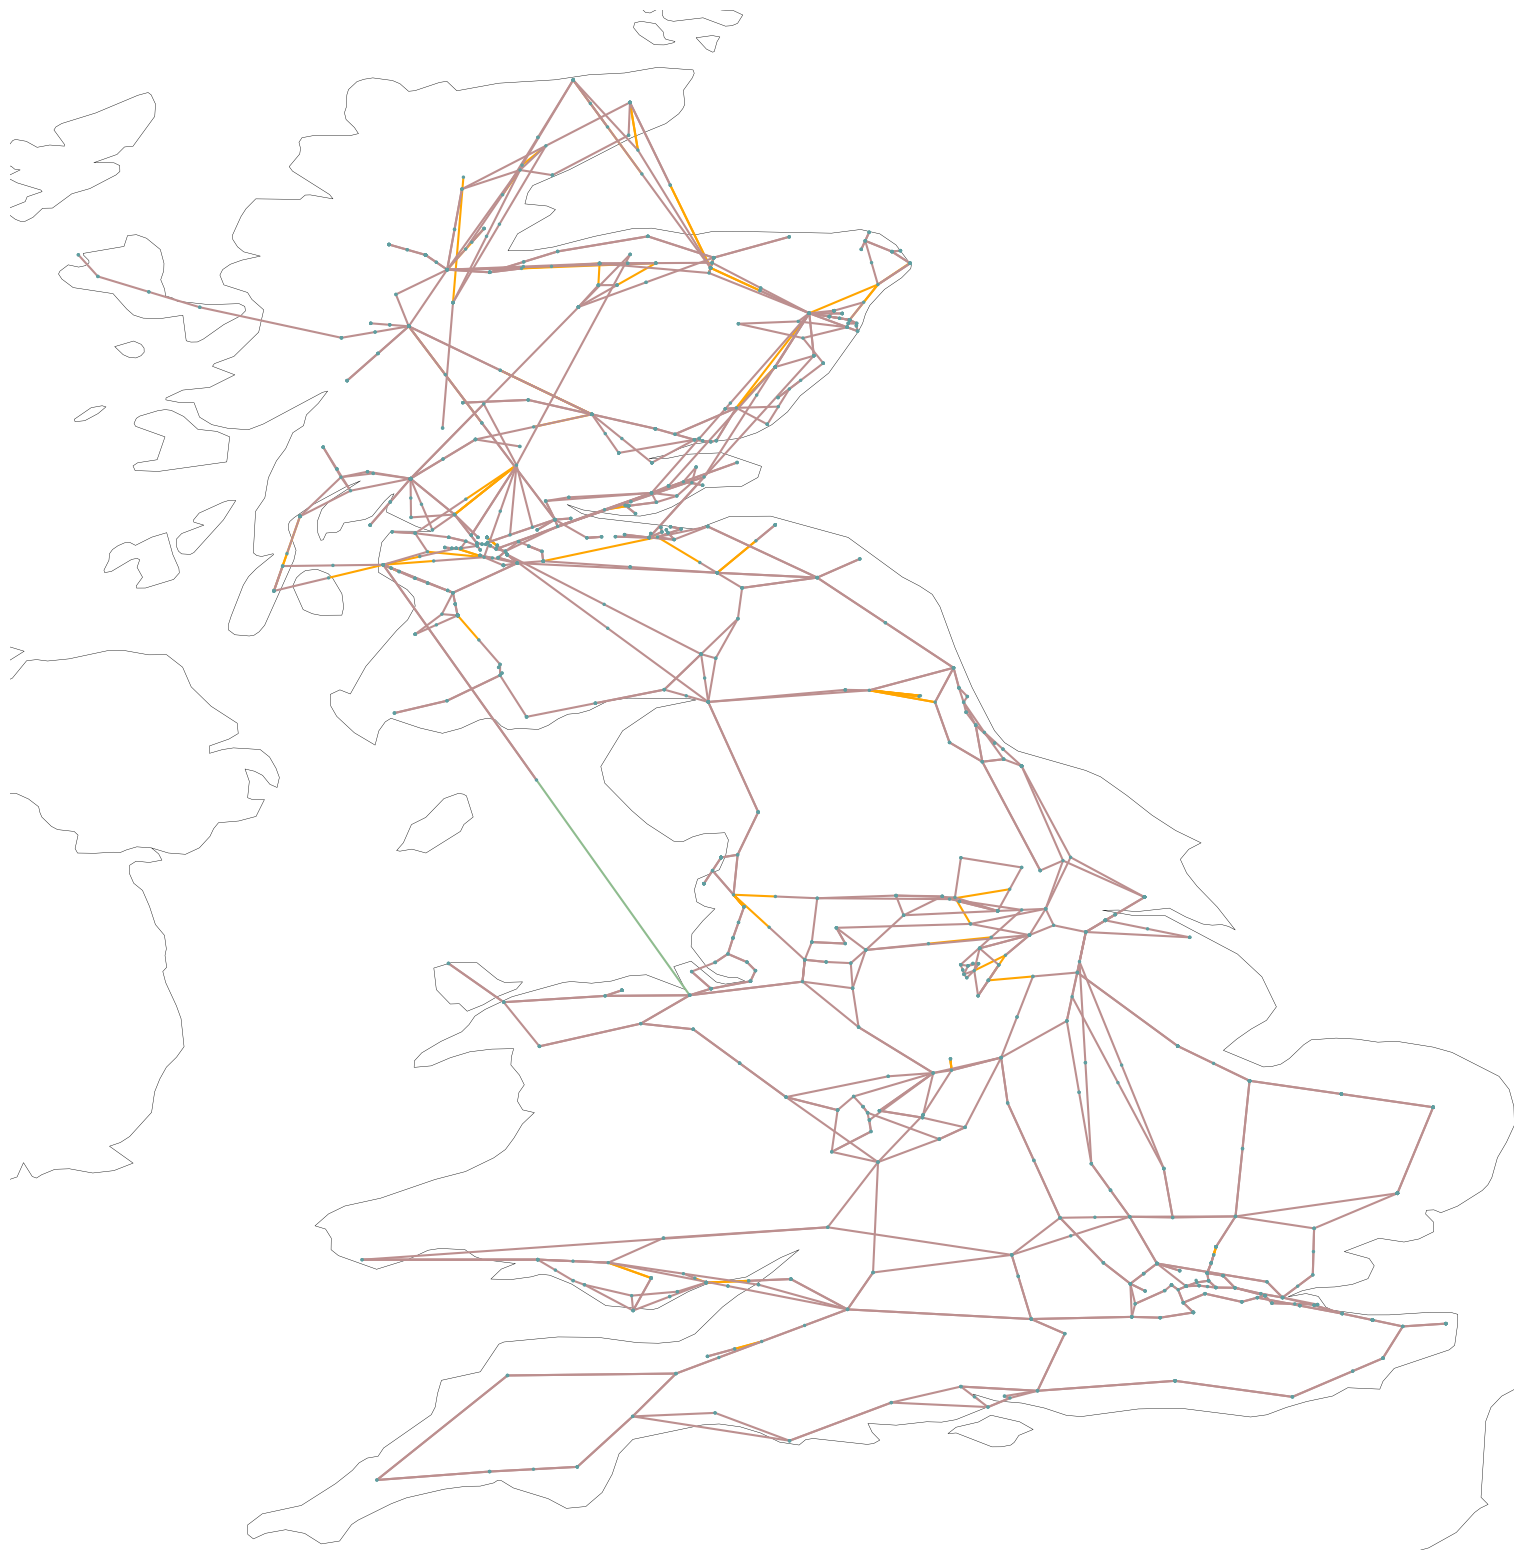

In [12]:
print(network.loads)
plt.rc("figure", figsize=(20, 20))

# Now you can plot the network
network.plot(bus_sizes=0.0001)
network.consistency_check()
# are all buses connected?

In [13]:
import pypsa
import networkx as nx

# Assuming 'network' is your PyPSA network
graph = network.graph()

# Find the connected components
connected_components = list(nx.connected_components(graph))

# The largest component is usually the main system
main_system = max(connected_components, key=len)

# print("Main system:", main_system)
print("Number of buses in the main system:", len(main_system))
# print("Buses:", network.buses.index)

# Find the buses not in the main system
isolated_buses = [bus for bus in network.buses.index if bus not in main_system]

print("Isolated buses:", isolated_buses)
print("Number of isolated buses:", len(isolated_buses))

Number of buses in the main system: 1990
Isolated buses: []
Number of isolated buses: 0
